<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Cakra !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Cakra ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Cakra dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Konten <a id='back'></a>

* [Deskripsi Proyek](#intro)

* [Tahap 1.Data load](#data_load)
    * [1.1 Memuat Library](#library_load)
    * [1.2 Informasi dan Deskripsi Data Awal](#data_info)

    
* [Tahap 2. Exploratory Data Analysis](#data_analysis) 

   * [2.1 Teliti proporsi dari berbagai jenis usaha. Buat grafiknya](#business_type) 
   * [2.2 Teliti proporsi dari usaha berbasis waralaba dan nonwaralaba. Buat grafiknya](#frachise_or_no) 
   * [2.3 Jenis usaha mana yang biasanya merupakan usaha berbasis waralaba?](#frachise_type) 
   * [2.4 Mana yang merupakan ciri-ciri dari jenis usaha berbasis waralaba: memiliki banyak tempat dengan jumlah kursi yang sedikit atau memiliki beberapa tempat dengan jumlah kursi yang banyak?](#chair_franchise)
   * [2.5 Tentukan jumlah rata-rata kursi untuk setiap jenis usaha. Secara rata-rata, jenis usaha mana yang memiliki jumlah kursi terbanyak? Buat grafiknya](#avg_chair)
   * [2.6 Pindahkan data nama jalan dari kolom address ke kolom terpisah](#name_cleaned)
   * [2.7 Buat grafik yang menampilkan sepuluh nama jalan teratas berdasarkan jumlah usaha (tempat makan)](#top_10_roads) 
   * [2.8 Temukan jumlah jalan yang hanya memiliki satu usaha (tempat makan)](#one_business) 
   * [2.9 Untuk jalan yang dihuni oleh banyak usaha (tempat makan), perhatikan distribusi jumlah kursinya. Tren apa yang bisa kamu amati?](#chair_distribution)

 
 
  
    





* [Kesimpulan Umum](#conlusion)
* [Link Presentasi](#presentation)

## Deskripsi proyek <a id='intro'></a>

Kamu telah memutuskan untuk membuka sebuah kafe kecil di Los Angeles. Kafe milikmu bisa dibilang cukup unik karena kamu "memperkerjakan" robot sebagai pelayan atau pramusaji. Proyek ini memang menjanjikan, tetapi membutuhkan modal yang besar. Oleh karena itu, kamu dan para mitra memutuskan untuk menarik minat investor agar mau berinvestasi. Mereka tertarik dengan kondisi pasar saat ini—tetapi, apakah kamu bisa mempertahankan kesuksesan saat daya tarik sang robot mulai pudar?
Mengingat kamu adalah seorang pakar analisis, para mitra pun memintamu untuk mempersiapkan sejumlah riset pasar. Kamu memiliki data open-source terkait jenis-jenis usaha tempat makan di LA.





<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 1.  Data Preparation <a id='data_load'></a>

## 1.1 Import Libraries and load datasets <a id='library_load'></a>

In [1]:
import pandas as pd, numpy as np, datetime as dt
import matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px
from scipy import stats as st

**Deskripsi data**

Tabel rest_data:

- `object_name` — nama usaha
- `chain` — usaha berbasis waralaba (TRUE/FALSE)
- `object_type` — jenis usaha
- `address` — alamat
- `number` — jumlah kursi

In [2]:
path = r'C:/Users/cakra2/OneDrive/Desktop/TripleTen-Project-Sprint/PROJECT 9/DATASET/'

dataset = path+'rest_data_us.csv'
rest_data = pd.read_csv(dataset)
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [3]:
rest_data.info()
rest_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
3280,15066,SHUTO IZAKAYA,3869 WILSHIRE BLVD,True,Restaurant,35
3180,14966,YAKITORIYA,11301 W OLYMPIC BLVD STE 101,False,Restaurant,40
8431,20217,OI ASIAN FUSION,4734 HOLLYWOOD BLVD,False,Restaurant,5
8395,20181,DOMINOS PIZZA,520 W AVENUE 26 # #B,True,Pizza,12
7467,19253,GLATT MART KITCHEN,8706 W PICO BLVD,False,Restaurant,7


Tahap ini kita memuat library yang diperlukan dan juga memuat dataset yang akan digunakan. Selain itu kita mengecek info data dan sample data terlihat bahwa ada 6 kolom dan 9651 pada masing masing data. Tetapi terdapat 3 data hilang pada kolom chain yang akan diproses pada tahap selanjutnya yaitu pengecekan kualitas data



<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 1.2 Data Quality Checking <a id='data_info'></a>

In [4]:
rest_data.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [5]:
null_value = rest_data.isna().sum().to_frame()
null_value = null_value.rename(columns = {0: 'missing_values'})
null_value['% of total'] = (null_value['missing_values'] / rest_data.shape[0]).round(2)
null_value.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
chain,3,0.0
id,0,0.0
object_name,0,0.0
address,0,0.0
object_type,0,0.0
number,0,0.0


In [6]:
rest_data = rest_data.dropna().reset_index(drop = True)

In [7]:
rest_data['id'] = rest_data['id'].astype('str')
rest_data['chain'] = rest_data['chain'].astype('bool')

In [8]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   object
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   bool  
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: bool(1), int64(1), object(4)
memory usage: 386.4+ KB


In [9]:
rest_data.duplicated().sum()

0

In [10]:
rest_data[rest_data['number'] <= 0].count()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

Terdapat 3 data hilang pada kolom chain, untuk itu kita lakukan dropna agar data menjadi rata. Selain itu juga mengubah kedua tipe data pada kolom `id` menjadi string dan `chain` menjadi boolean untuk representasi data yang lebih baik. Selain itu kita juga memeriksa apakah ada data yang terduplikat dan nilai negatif. Data sekarang sudah bersih dan dapat dilanjutkan menuju proses analisis data

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2. Exploratory Data Analysis <a id='data_analysis'></a>

## 2.1 Teliti proporsi dari berbagai jenis usaha. Buat grafiknya <a id='business_type'></a>

In [11]:
business_type = rest_data['object_type'].value_counts().reset_index()
business_type.columns = ['object_type', 'count']
business_type['percentage'] = ((business_type['count'] / business_type['count'].sum()) * 100).round(2)
business_type

,object_type,count,percentage
0,Restaurant,7253,75.18
1,Fast Food,1066,11.05
2,Cafe,435,4.51
3,Pizza,319,3.31
4,Bar,292,3.03
5,Bakery,283,2.93


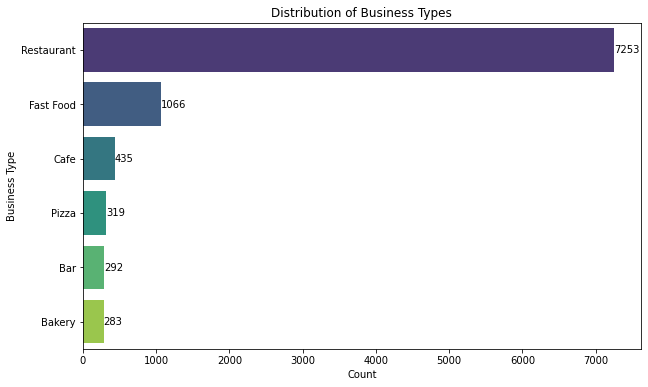

In [12]:
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=business_type, y='object_type', x='count', palette='viridis')

# Add labels to the bars
for p in bar.patches:
    bar.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black')

plt.title('Distribution of Business Types')
plt.xlabel('Count')
plt.ylabel('Business Type')
plt.show()


In [ ]:
fig = px.pie(business_type, names='object_type', values='percentage', title='Distribution of Business Types')
#fig.update_layout(width=500, height=500)
fig.show()

**Findings:**

- Restoran (Restaurant): Menyumbang lebih dari 75% dari total tempat usaha dalam dataset. Ini menunjukkan bahwa restoran merupakan jenis usaha paling umum di antara yang lain.

- Makanan Cepat Saji (Fast Food): Menyumbang sekitar 11% dari total tempat usaha. Meskipun jumlahnya lebih sedikit dibandingkan restoran, makanan cepat saji masih memiliki andil yang signifikan.

- Cafe: Meskipun jumlahnya lebih sedikit dibandingkan restoran dan makanan cepat saji, kafe masih memegang posisi penting dengan sekitar 4.51%.

- Pizza, Bar, Bakery: Menyumbang sekitar 3-3.5% masing-masing. Meskipun jumlahnya lebih kecil, keberagaman jenis usaha ini tetap penting untuk pertimbangan konsumen.

**Insight:**

Pemilik usaha atau calon investor dapat menggunakan informasi ini untuk memahami lanskap pasar dan memilih jenis usaha yang sesuai dengan kebutuhan dan tren pasar. Serta membantu pengambilan keputusan strategis dalam pengembangan bisnis, pemasaran, dan pertumbuhan usaha

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.2 Teliti proporsi dari usaha berbasis waralaba dan nonwaralaba. Buat grafiknya <a id='franchise_or_no'></a>

In [ ]:
chain = rest_data.groupby('chain')['id'].count().reset_index()
chain

In [ ]:
fig = px.pie(chain, names='chain', values='id', title='Distribusi jenis tempat usaha berbasis waralaba dan nonwaralaba')
#fig.update_layout(width=500, height=500)
fig.show()

**Findings:**

- Mayoritas tempat usaha sekitar 5972 (61.9%) adalah nonwaralaba.
- Proporsi tempat usaha berbasis waralaba sekitar 3676 (38%, menunjukkan adanya variasi di pasar antara waralaba dan nonwaralaba.

**Insight:**


- Meskipun ada banyak tempat usaha nonwaralaba, tempat usaha berbasis waralaba juga memiliki andil yang signifikan di pasar. Ini dapat menjadi peluang atau pertimbangan strategis untuk pemilik usaha atau calon investor.

- Pelaku industri dapat mempertimbangkan tren dan preferensi konsumen terkait dengan jenis usaha ini untuk merencanakan strategi pemasaran dan pertumbuhan yang efektif.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.3  Jenis usaha mana yang biasanya merupakan usaha berbasis waralaba? <a id='franchise_type'></a>

In [ ]:
business_chain = pd.pivot_table(rest_data, values ='id', index = 'object_type',
                                columns = 'chain', aggfunc='count', margins=True)
business_chain = business_chain[:6].fillna(0).reset_index()
business_chain

In [ ]:
business_chain['ratio'] = round(business_chain[True] / business_chain['All'] * 100, 2)
business_chain

In [ ]:
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=business_chain.sort_values(by='ratio', ascending=False), x='ratio', y='object_type',palette='viridis')

# Add labels to the bars
for p in bar.patches:
    bar.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black')

plt.title('Distribusi usaha berbasis waralaba berdasarkan rasio')
plt.xlabel('Count')
plt.ylabel('Business Type')
plt.show()



**Findings:**

- Bakery: Semua bakery dalam dataset ini berbasis waralaba, yang menghasilkan rasio 100%. Tidak ada bakery non-waralaba.

- Cafe: Dari total 435 cafe, 169 di antaranya non-waralaba (38.85%), sedangkan 266 berbasis waralaba (61.15%).

- Fast Food: Dari total 1066 tempat makan cepat saji, 461 di antaranya non-waralaba (43.25%), dan 605 berbasis waralaba (56.75%).

- Pizza: Dari total 319 tempat pizza, 166 di antaranya non-waralaba (52.04%), sedangkan 153 berbasis waralaba (47.96%).

- Restoran: Dari total 7253 restoran, 4961 di antaranya non-waralaba (68.40%), dan 2292 berbasis waralaba (31.60%).

- Bar: Dari total 292 bar, 215 di antaranya non-waralaba (73.63%), dan 77 berbasis waralaba (26.37%).



**Insight:**

- Bisnis bakery sepenuhnya berbasis waralaba dalam dataset ini.

- Kategori cafe dan tempat makan cepat saji memiliki proporsi yang signifikan dalam kategori berbasis waralaba.

- Pizza, Restoran, dan Bar cenderung memiliki rasio rendah dan cenderung berbasi non waralaba 

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.4 Mana yang merupakan ciri-ciri dari jenis usaha berbasis waralaba: memiliki banyak tempat dengan jumlah kursi yang sedikit atau memiliki beberapa tempat dengan jumlah kursi yang banyak? <a id='chair_franchise'></a>



In [ ]:
chain = rest_data[rest_data['chain']==True].reset_index(drop= True)
chain['object_name'].value_counts().head()

In [ ]:
chain.shape

In [ ]:
# Display a histogram of the number of seats for chain businesses
plt.figure(figsize=(10, 6))
sns.histplot(data=chain, x='number', binwidth=10, kde=True, color='skyblue')
plt.title("Distribusi Jumlah Kursi untuk Bisnis Berbasis Waralaba")
plt.xlabel("Jumlah Kursi")
plt.ylabel("Frekuensi")

**Findings:**

- Bisnis yang paling umum dalam kategori berbasis waralaba adalah "THE COFFEE BEAN & TEA LEAF" dengan 47 tempat, diikuti oleh "SUBWAY" dengan 31 tempat. Ini menunjukkan bahwa beberapa merek waralaba memiliki sejumlah besar cabang.

- Mayoritas bisnis berbasis waralaba memiliki jumlah kursi yang relatif sedikit, dengan sebagian besar berada di rentang 0 hingga 50 kursi.

**Insight:**

- Ciri-ciri umum dari bisnis berbasis waralaba dalam dataset ini adalah memiliki banyak cabang dengan jumlah kursi yang relatif sedikit. Ini dapat mencerminkan model bisnis waralaba yang lebih fokus pada skala kecil dan operasional yang efisien. Jumlah kursi yang lebih sedikit mungkin menjadi strategi untuk meningkatkan kecepatan layanan dan efisiensi operasional.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.5 Tentukan jumlah rata-rata kursi untuk setiap jenis usaha. Secara rata-rata, jenis usaha mana yang memiliki jumlah kursi terbanyak? Buat grafiknya. <a id='avg_chair'></a>



In [ ]:
# Cek mean and median dari jumlah kursinya
mean_chair = rest_data.groupby('object_type').agg(mean=('number','mean'),median=('number','median')).sort_values(by='mean', ascending=False)
mean_chair

In [ ]:
fig = px.bar(mean_chair,
             x=['mean', 'median'],
             y=mean_chair.index,
             orientation='h',

             title='Mean dan Median kursi untuk setiap jenis usaha',
             color_discrete_map={'mean': 'skyblue', 'median': 'orange'})

# Customize the layout
fig.update_layout(showlegend=True, legend_title_text='Statistic')
fig.update_xaxes(title_text='Number of Seats')

# Show the interactive plot
fig.show()

**Findings:**
- Restoran memiliki rata-rata jumlah kursi tertinggi (48.05), diikuti oleh bar (44.77), dan tempat makan cepat saji (31.84).

- Bakery memiliki rata-rata jumlah kursi terendah (21.77).

- Restoran dan bar cenderung memiliki kapasitas tempat yang lebih besar.

**Insight:**

- Pada semua jenis usaha, nilai mean jumlah kursi lebih tinggi daripada median.

- Hal ini menunjukkan adanya distribusi yang sedikit miring ke kanan (right-skewed) pada data jumlah kursi.

- Terdapat beberapa tempat dengan jumlah kursi yang signifikan lebih tinggi, yang dapat mempengaruhi nilai mean.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.6 Pindahkan data nama jalan dari kolom address ke kolom terpisah.  <a id='name_cleaned'></a>



In [ ]:
address = rest_data['address'].apply(lambda x: ' '.join(x.split(' ')[1:])).to_frame()
address = address['address'].apply(lambda x: ''.join(x.split(' # ')[0])).to_frame()
address = address['address'].apply(lambda x: ''.join(x.split('#')[0])).to_frame()

address.value_counts().tail(10)


In [ ]:
address['count'] = 1
top_10_address = address.groupby('address').count().sort_values(by='count', ascending = False)[0:10].reset_index()
top_10_address

In [ ]:
rest_data['address_clean'] = address['address']
rest_data

Tahapan ini memisahkan data alamat menjadi tanpa nomor alamat. Selain itu terdapat top 10 jalan yang menjadi pusat bisnis terbanyak. Lalu data yang telah dipisah dimasukkan ke dataframe rest_data dengan nama kolom `address_clean`

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.7 Buat grafik yang menampilkan sepuluh nama jalan teratas berdasarkan jumlah usaha (tempat makan).  <a id='top_10_roads'></a>

In [ ]:
street_restaurant_counts = rest_data[rest_data['object_type'] == 'Restaurant'].groupby('address_clean')['object_type'].count()

top_10_restaurant = street_restaurant_counts.sort_values(ascending=False)[0:10].reset_index()
top_10_restaurant = top_10_restaurant.rename(columns={'address_clean': 'address', 'object_type': 'count'})

top_10_restaurant


In [ ]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=top_10_restaurant, x='count', y='address', palette='viridis')

# Annotate the bars with count values
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_width())}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='left', va='center', xytext=(5, 0),
                     textcoords='offset points', fontsize=10, color='black')

plt.title("Top 10 Addresses by Count")
plt.xlabel("Count")
plt.ylabel("Address")

plt.show()

**Findings**


- W SUNSET BLVD dan W PICO BLVD adalah dua nama jalan teratas dengan jumlah restoran tertinggi, masing-masing 235 dan 232 restoran. Hal ini menunjukkan bahwa kedua jalan ini adalah pusat kegiatan kuliner yang signifikan, dan mungkin menjadi tujuan utama bagi orang-orang yang mencari berbagai pilihan makanan.

- WILSHIRE BLVD dan HOLLYWOOD BLVD juga mencatat jumlah restoran yang cukup tinggi, dengan masing-masing 183 dan 163 restoran. Keberagaman kuliner di daerah ini dapat menjadi daya tarik bagi pengunjung dan peluang investasi untuk bisnis makanan dan minuman.

- SANTA MONICA BLVD, S WESTERN AVE, dan W 3RD ST juga termasuk dalam nama jalan dengan jumlah restoran yang signifikan. Keberagaman ini menciptakan lingkungan kuliner yang dinamis dan dapat menarik berbagai konsumen.


**Insight:**

- Peta Kuliner: Pemangku kepentingan dapat menggunakan informasi ini untuk membuat peta kuliner di daerah tersebut. Mengetahui area dengan konsentrasi restoran yang tinggi dapat membantu dalam merencanakan pemasaran atau ekspansi bisnis.

- Potensi Investasi: Nama jalan seperti W SUNSET BLVD dan W PICO BLVD menunjukkan tingginya potensi investasi di sektor makanan dan minuman. Pengusaha atau investor dapat mempertimbangkan lokasi ini untuk membuka bisnis baru.

- Persaingan dan Diversifikasi: Tingginya jumlah restoran di beberapa nama jalan mengindikasikan persaingan yang ketat. Pengusaha baru perlu memahami pasar dengan baik dan mencari cara untuk membedakan bisnis mereka.

- Analisis Trend Kuliner: Data ini juga dapat digunakan untuk menganalisis tren kuliner. Mengetahui jenis makanan atau gaya restoran yang dominan di suatu daerah dapat membantu pemangku kepentingan menyesuaikan strategi mereka.


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.8 Temukan jumlah jalan yang hanya memiliki satu usaha (tempat makan)  <a id='one_business'></a>

In [ ]:
restaurant_counts_per_street = rest_data[rest_data['object_type'] == 'Restaurant'].groupby('address_clean')['object_type'].count()


# Menemukan jalan yang hanya memiliki satu usaha (tempat makan)
streets_with_single_restaurant = restaurant_counts_per_street[restaurant_counts_per_street == 1]
streets_with_single_restaurant


In [ ]:
# Jumlah jalan yang hanya memiliki satu usaha (tempat makan)
number_of_streets_with_single_restaurant = len(streets_with_single_restaurant)

print(f"Jumlah jalan yang hanya memiliki satu usaha (tempat makan): {number_of_streets_with_single_restaurant}")

**Findings:**

- 1149 Jalan dengan Satu Usaha: Terdapat 1149 nama jalan di dataset yang hanya memiliki satu usaha (tempat makan). Ini mencerminkan keragaman dan distribusi yang luas dari usaha makanan dan minuman di berbagai bagian kota atau wilayah.

**Insight:**

- Potensi Pertumbuhan: Jalan-jalan dengan satu usaha dapat menunjukkan potensi pertumbuhan dan peluang investasi. Pengusaha atau investor dapat mengeksplorasi daerah-daerah ini untuk melihat apakah ada peluang untuk membuka usaha baru.

- Keunikan dan Spesialisasi: Jalan-jalan dengan satu usaha mungkin menunjukkan bisnis yang berspesialisasi atau unik dalam jenis makanan atau layanan tertentu. Ini dapat menjadi daya tarik bagi konsumen yang mencari pengalaman kuliner yang berbeda.

- Analisis Lokasi: Pemangku kepentingan dapat melakukan analisis lebih lanjut untuk memahami konteks geografis dan demografis dari jalan-jalan ini. Hal ini dapat membantu dalam merencanakan strategi pemasaran yang lebih terfokus.








<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.9 Untuk jalan yang dihuni oleh banyak usaha (tempat makan), perhatikan distribusi jumlah kursinya. Tren apa yang bisa kamu amati?  <a id='chair_distribution'></a>

In [ ]:
street = (rest_data
           .groupby('address_clean')
           .agg({'id':'count','number':'mean'})
           .rename(columns={'id':'number_of_establishment', 'number': 'avg_number_of_seats'})
           .reset_index()
           )
street = street[street['number_of_establishment'] > 1].sort_values(by='number_of_establishment', ascending=False)
street

In [ ]:
# Membuat jointplot menggunakan Seaborn
plt.figure(figsize=(12, 8))
joint_plot = sns.jointplot(data=street, x='number_of_establishment', y='avg_number_of_seats', kind='reg')
joint_plot.set_axis_labels("Number of Establishments", "Average Number of Seats", fontsize=12)
joint_plot.fig.suptitle("Hubungan antara Jumlah Usaha dan Rata-rata Jumlah Kursi di Jalan yang Dihuni Banyak Usaha", y=1.02)
plt.show()

In [ ]:
avg_restaurants_by_street = rest_data[rest_data['object_type'] == 'Restaurant'].groupby('address_clean')['object_type'].count().mean()
avg_restaurants_by_street


In [ ]:
streets_more_than_100 = street_restaurant_counts[street_restaurant_counts > 100].sort_values(ascending=False)
streets_more_than_100 

In [ ]:
streets_filtered = rest_data[rest_data['address_clean'].isin(streets_more_than_100.index)]
streets_filtered

In [ ]:
avg_restaurant_seats = streets_filtered.groupby('address_clean')['number'].mean().sort_values(ascending=False).reset_index()
# Membuat plot bar sederhana
plt.figure(figsize=(10, 6))
sns.barplot(x='number', y='address_clean', data=avg_restaurant_seats  , palette='viridis')

# Menambahkan angka pada batang bar
for i, value in enumerate(avg_restaurant_seats ['number']):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Rata-rata Kursi per Restoran')
plt.ylabel('Nama Jalan')
plt.title('Rata-rata Kursi per Restoran di Jalan dengan Banyak Restoran')
plt.show()

In [ ]:
def distribution_each_streets(data, *street_names):
    for street_name in street_names:
        # Membersihkan data berdasarkan nama jalan
        street_data = data.loc[data['address_clean'] == street_name].reset_index(drop=True)
        
        # Menampilkan beberapa baris pertama data
        print(street_data.head())
        
        # Membuat distribusi jumlah kursi menggunakan Seaborn
        plt.figure(figsize=(12, 8))
        sns.histplot(data=street_data, x='number', bins=20, kde=True, color='skyblue')
        plt.title(f"Distribusi Jumlah Kursi di Jalan {street_name}")
        plt.xlabel("Jumlah Kursi")
        plt.ylabel("Frekuensi")
        plt.show()

# Memanggil fungsi untuk beberapa jalan
distribution_each_streets(rest_data, 'HOLLYWOOD BLVD','WILSHIRE BLVD', 'W OLYMPIC BLVD','MELROSE AVE', 'W SUNSET BLVD' )

**Findings:**

- Rata-rata Jumlah Kursi: Terdapat variasi rata-rata jumlah kursi di jalan-jalan dengan banyak usaha (tempat makan). Beberapa jalan memiliki rata-rata kursi yang lebih tinggi daripada yang lain.

- Tren Positif: Tampaknya ada tren positif antara jumlah usaha (tempat makan) di suatu jalan dengan rata-rata jumlah kursi. Artinya, semakin banyak usaha di suatu jalan, rata-rata jumlah kursi cenderung meningkat.

- Jalan dengan Jumlah Kursi Tinggi: Jalan seperti "W SUNSET BLVD" dan "WILSHIRE BLVD" memiliki rata-rata jumlah kursi yang cukup tinggi, mencapai lebih dari 50 kursi per usaha.

**Insight:**

- Potensi Kepopuleran: Jalan-jalan dengan rata-rata jumlah kursi yang tinggi mungkin menunjukkan kepopuleran dan daya tarik bagi pengunjung. Pemilik usaha dapat mempertimbangkan strategi untuk meningkatkan jumlah kursi mereka.

- Variasi di Setiap Jalan: Meskipun ada tren positif secara umum, masih terdapat variasi di setiap jalan. Analisis ini dapat membantu pemilik usaha untuk memahami posisi mereka dalam konteks jalan yang sama.

- Pertimbangan Ekspansi: Bagi pemilik usaha yang ingin melakukan ekspansi, pemahaman terhadap tren jumlah kursi di jalan-jalan dengan banyak usaha dapat menjadi pertimbangan penting.

- Pemahaman Lokal: Analisis ini memberikan wawasan tentang karakteristik bisnis di setiap jalan, yang dapat digunakan untuk pemahaman lebih baik tentang pasar lokal.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Kesimpulan Umum  <a id='conclusion'></a>

**Kesimpulan:**
1. Proporsi Jenis Usaha:

- Restoran (Restaurant): Menyumbang lebih dari 75% dari total tempat usaha dalam dataset, menunjukkan popularitas dan keberagaman restoran di Los Angeles.

- Makanan Cepat Saji (Fast Food): Menyumbang sekitar 11%, tetap memiliki andil yang signifikan di pasar.

- Cafe: Meskipun jumlahnya lebih sedikit, kafe tetap memegang posisi penting dengan sekitar 4.51%.

2. Waralaba vs. Nonwaralaba:

- Nonwaralaba: Mayoritas tempat usaha (61.9%) adalah nonwaralaba.

- Waralaba: Menyumbang sekitar 38%, menunjukkan variasi di pasar antara waralaba dan nonwaralaba.

3. Jenis Usaha Berbasis Waralaba:

- Bakery: 100% berbasis waralaba.

- Cafe dan Fast Food: Memiliki proporsi yang signifikan dalam kategori berbasis waralaba.

4. Jumlah Kursi Rata-rata:

- Restoran: Memiliki rata-rata jumlah kursi tertinggi (48.05).

- Bakery: Memiliki rata-rata jumlah kursi terendah (21.77).

5. Top 10 Nama Jalan:

- W SUNSET BLVD dan W PICO BLVD: Menjadi pusat kegiatan kuliner dengan jumlah restoran tertinggi.

- WILSHIRE BLVD dan HOLLYWOOD BLVD: Juga mencatat jumlah restoran yang signifikan.

6. Jalan dengan Satu Usaha:

- 1149 Jalan: Menunjukkan keragaman dan distribusi usaha makanan di berbagai bagian kota atau wilayah.

7. Distribusi Jumlah Kursi di Jalan Dengan Banyak Usaha:

- Tren Positif: Ada tren positif antara jumlah usaha di suatu jalan dengan rata-rata jumlah kursi, menunjukkan potensi kepopuleran.

- Jalan Dengan Jumlah Kursi Tinggi: W SUNSET BLVD dan WILSHIRE BLVD memiliki rata-rata jumlah kursi yang cukup tinggi.

8. Pengembangan Usaha Berbasis Waralaba:

- Peluang: Model bisnis waralaba dapat menjadi peluang untuk pertumbuhan bisnis. Fokus pada kategori seperti bakery, cafe, atau fast food dapat menguntungkan.

- Pertimbangan: Perlu mempertimbangkan bahwa beberapa jenis usaha, seperti restoran dan bar, cenderung memiliki rasio rendah dalam model waralaba.

**Rekomendasi Terbaik:**

Direkomendasikan untuk pembukaan kafe unik dengan penggunaan robot sebagai pelayan di lokasi strategis seperti W SUNSET BLVD atau W PICO BLVD, berfokus pada model bisnis waralaba inovatif, menyajikan menu bervariasi dan berkualitas tinggi, memanfaatkan teknologi untuk memberikan pengalaman pelanggan yang unik, memperluas jumlah kursi dengan strategi pemasaran yang efektif, dan menjelajahi peluang kerjasama dengan merek-merek terkenal untuk memperkuat daya tarik dan pertumbuhan usaha di pasar makanan dan minuman Los Angeles yang dinamis.

## Untuk link presentasi bisa dilihat dibawah ini <a id='presentation'></a>

[Link Presentasi](https://drive.google.com/file/d/1B32pK6JAEpop2JyUyHcUqrdIBmeVk0H2/view?usp=sharing)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- sepertinya presentasi belum dibuat ya ?

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Oh iya, maaf kak lupa save di jupyternya, untuk linknya sudah saya sematkan kembali diatas kak
</div>